<CENTER><h1> Unveiling Trends in NYC Property Sales: A Comprehensive Analysis & Sales prediction for Informed Real Estate Strategies</CENTER></h1>

<h5><CENTER>TEAM CONTRIBUTOR: ABDULLA MAMUN, RACHAEL OJOPAGOGO, MAPALO LUKASHI</CENTER></h5>

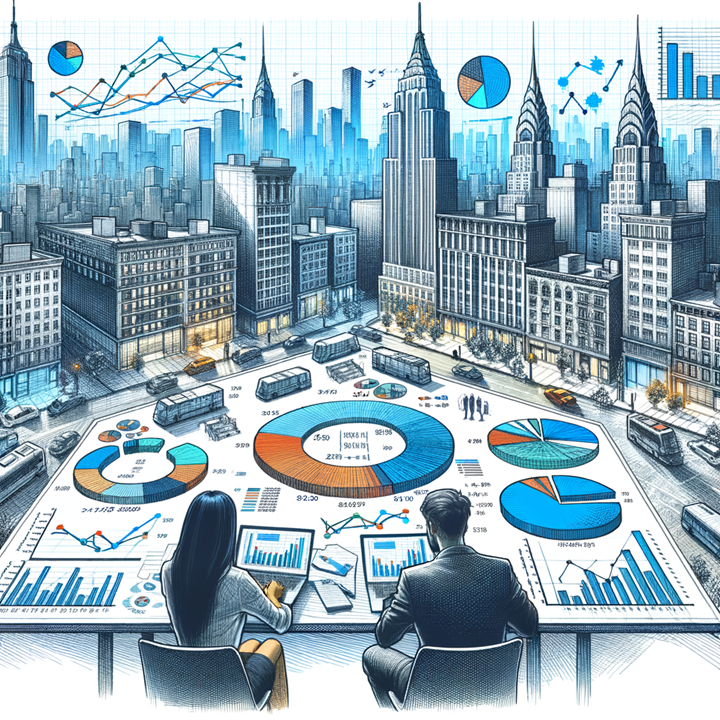

# Table of Contents
- Abstract
- Introduction
- Exploratory Data Analysis
- Data Preparation
- Prepped Data Review
- Machine Learning Model
- Model Selection
- Ensemble Model
- Conclusions


# Abstract
This study embarks on a comprehensive analysis of property sales across the five boroughs of New York City in 2023, utilizing a dataset from the Department of Finance Rolling Sales files containing over 70,000 transactions. Our objective was to uncover significant factors influencing property sales prices and to predict future sales trends. Through meticulous exploratory data analysis, we identified key variables impacting prices and implemented several data preparation techniques, including normalization and one-hot encoding, to refine our dataset for advanced predictive modeling. We developed and compared three machine learning models: Linear Regression, Decision Tree, and Random Forest, and further enhanced prediction accuracy through a Stacking Ensemble model. The ensemble model, integrating insights from individual models, proved superior in forecasting sale prices. Our findings offer valuable insights for real estate stakeholders and suggest directions for future research, particularly in refining model predictions and exploring external factors affecting the real estate market.


**Objectives:** The primary objective of this project is to analyze property sales data from New York City in 2023, covering all five boroughs, to provide actionable insights for real estate agents. These insights will aid in competitive pricing strategies for the upcoming 2024 market.

**Methodology:** We collected NYC property sales data, focusing on a subset of available features due to time constraints. The analysis involved extensive data cleaning, exploratory data analysis, and the construction of machine learning models including Decision Tree, Random Forest, SVM, and a Stacking Ensemble Model to predict property sale prices based on historical data.

**Findings** The models demonstrated varied performance, with the Random Forest and Stacking Ensemble Model showing the best results in terms of RMSE and R² values. The insights derived from the analysis will help real estate agents to strategize pricing based on factors like neighborhood, property size, and market trends.

# Introduction
In the dynamic landscape of New York City's real estate market, understanding the factors that influence property sales is crucial for investors, developers, and policymakers alike. This project was conceived to delve into the complexities of property sales across all five boroughs of NYC, focusing on the year 2023. The primary goal is to identify the key variables that affect sale prices and to develop predictive models that can forecast future sales trends with high accuracy.

The dataset, sourced from the Department of Finance Rolling Sales files, comprises over 70,000 property transactions and includes diverse features such as borough location, gross square feet, and sale price. This rich dataset provides a unique opportunity to explore the nuanced interactions between property characteristics and their impact on sale prices across different boroughs.

To address our research questions, we employed a rigorous methodological approach. Initially, we conducted a thorough exploratory data analysis (EDA) to uncover initial insights and guide our subsequent data preparation and modeling strategies. We then prepared the data through various techniques including normalization, log transformation, and one-hot encoding to ensure its suitability for modeling.

Our analytical journey culminated in the development and comparison of three distinct machine learning models: Linear Regression, Decision Tree, and Random Forest. To further refine our predictions, we also explored a Stacking Ensemble model, which integrates the outputs of the individual models to enhance predictive performance.

This project not only aims to provide actionable insights for real estate stakeholders but also contributes to the broader field of urban economic studies by showcasing the application of advanced data science techniques in real-world contexts.
The dataset we sourced from this [site](https://www.nyc.gov/site/finance/property/property-rolling-sales-data.page)
and Data Descriptions are [here](https://www.nyc.gov/site/finance/property/glossary-property-sales.page).
Building Code Description [Description](https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html). 
In summary form, we have also described here.

| Feature Name            | Feature Description                                                |
| -----------------------| ------------------------------------------------------------------|
| NEIGHBORHOOD            | Under the Borough have many neighborhood                                       |
| BUILDING CLASS CATEGORY | “A” for one-family homes, “O” for office buildings. “R5” commercial condominium unit.|
| TAX CLASS AT PRESENT    | Classes 1, 2, 3, and 4 based on the use of the property             |
| BLOCK                   | A Tax Block is a sub-division of the borough on which real properties are located.|
| LOT                     | A Tax Lot is a subdivision of a Tax Block and represents the property's unique location.|
| RESIDENTIAL UNITS       | The number of residential units at the listed property              |
| COMMERCIAL UNITS        | The number of commercial units at the listed property.              |
| TOTAL UNITS             | The total number of units at the listed property.                   |
| LAND SQUARE FEET        | The land area of the property listed in square feet.               |
| GROSS SQUARE FT         | The total area of all the floors of a building including the land area & other spaces|
| YEAR BUILT              | Year the structure on the property was built.                      |
| SALE PRICE              | Price paid for the property.                                       |
| SALE DATE               | Date the property sold.                                            |
| 0 SALES PRICE          | A 0 sale indicates that there was a transfer of ownership without a cash consideration.|


## Research Approach

We employed several data manipulation and machine learning techniques to understand and predict property sale prices. The dataset included diverse features from neighborhood categories to building classes, which were explored to understand their impact on sales prices. Machine learning models were built to forecast prices and evaluate the market status comprehensively.

## Motivation

The motivation behind this project was to equip real estate professionals with precise market analysis and trend predictions to make informed decisions regarding property pricing. This would enable our sponsor to set competitive prices that are attractive to buyers, thereby enhancing market performance in the coming year.

## Research Questions:
Our research endeavors to answer key questions essential for real estate professionals:

- How do property prices vary across different seasons in NYC?
- What impact does neighborhood dynamics have on property sales pricing?
- Can we identify patterns in property size and area that influence sale prices?
- How do different tax classes contribute to variations in property pricing?

For the Prediction purpose:

- Which model performs best to predict the sales price to make right decision at setting price for upcoming year?
- Can demographic data help predict property prices accurately?

## Data Loading & Manipulation

We have download dataset from the web url to local machine and then from local machine to github repository and finally loaded into python jupyter notebook from the github repository using pandas library.

Import the necessary python libraries to analyze our data. 

In [1]:
# Import python libraries for data exploration
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Import filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import StackingRegressor
import shap

In [2]:
# Load the data from the github and read with read_csv function
df = pd.read_csv("https://github.com/mamun21616/DAV-6150/raw/main/allborough%20(1).csv")

# Read the first 5 observations from the dataset
df.head()

Unnamed: 0        borough neighborhood  building class category  \
0           0  Staten Island     ANNADALE  01 ONE FAMILY DWELLINGS   
1           1  Staten Island     ANNADALE  01 ONE FAMILY DWELLINGS   
2           2  Staten Island     ANNADALE  01 ONE FAMILY DWELLINGS   
3           3  Staten Island     ANNADALE  01 ONE FAMILY DWELLINGS   
4           4  Staten Island     ANNADALE  01 ONE FAMILY DWELLINGS   

  tax class at present building class at present apartment number  \
0                    1                        A1                0   
1                    1                        A1                0   
2                    1                        A1                0   
3                    1                        A2                0   
4                    1                        A2                0   

   residential units  commercial units  land square feet  gross square feet  \
0                1.0               0.0           10000.0             3904.0   
1                1.0               0.0            9968.0             3940.0   
2                1.0               0.0            5000.0             2200.0   
3                1.0               0.0            8190.0             2100.0   
4                1.0               0.0            7500.0             1600.0   

   year built  tax class at time of sale building class at time of sale  \
0      1980.0                          1                             A1   
1      1990.0                          1                             A1   
2      1940.0                          1                             A1   
3      1980.0                          1                             A2   
4      1970.0                          1                             A2   

   sale price  sale date  
0           0   8/2/2023  
1     1275000  3/17/2023  
2     1050000   6/6/2023  
3      385000  2/16/2023  
4           0  7/18/2023

The dataset includes property sales across all five boroughs of NYC for the year 2023, sourced from the Department of Finance Rolling Sales files. Our dataset contains 70842 rows and  16 columns.

In [3]:
# Check the data types
df.dtypes

Unnamed: 0                          int64
borough                            object
neighborhood                       object
building class category            object
tax class at present               object
building class at present          object
apartment number                   object
residential units                 float64
commercial units                  float64
land square feet                  float64
gross square feet                 float64
year built                        float64
tax class at time of sale           int64
building class at time of sale     object
sale price                          int64
sale date                          object
dtype: object

# Exploratory Data Analysis

In [4]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()

__Apply data cleaning approach__

In [5]:
del df['unnamed: 0'] #some sort of indexing
df = df.drop_duplicates(keep='last')
df = df.replace(' -  ', np.nan)
df = df.replace(' ', np.nan)

The above code snippet performs data cleaning on our dataFrame by removing an unnecessary index column, deleting duplicate rows while keeping the last occurrence, and replacing specific placeholder characters ('-' and empty spaces) with NaN to standardize missing values.

In [6]:
df['sale price'] = df['sale price'].fillna(0).astype('int')
df['sale price'].describe()

count    7.084200e+04
mean     1.251597e+06
std      6.970239e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.110000e+05
75%      9.980000e+05
max      5.981558e+08
Name: sale price, dtype: float64

__Column "BOROUGH" represented as numeric and this is less readable, we'll give actual column name for number.__

In [7]:
df['borough'] = df['borough'].astype(str)
df['borough'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df.tail()

borough neighborhood                   building class category  \
70837   Bronx     WOODLAWN            10 COOPS - ELEVATOR APARTMENTS   
70838   Bronx     WOODLAWN            10 COOPS - ELEVATOR APARTMENTS   
70839   Bronx     WOODLAWN            10 COOPS - ELEVATOR APARTMENTS   
70840   Bronx     WOODLAWN                        22 STORE BUILDINGS   
70841   Bronx     WOODLAWN  35 INDOOR PUBLIC AND CULTURAL FACILITIES   

      tax class at present building class at present apartment number  \
70837                    2                        D4                0   
70838                    2                        D4                0   
70839                    2                        D4                0   
70840                    4                        K1                0   
70841                    4                        P8                0   

       residential units  commercial units  land square feet  \
70837                0.0               0.0               0.0   
70838                0.0               0.0               0.0   
70839                0.0               0.0               0.0   
70840                0.0               1.0            9699.0   
70841                0.0               1.0            3121.0   

       gross square feet  year built  tax class at time of sale  \
70837                0.0      1957.0                          2   
70838                0.0      1957.0                          2   
70839                0.0      1957.0                          2   
70840             3400.0      1970.0                          4   
70841             2520.0      1970.0                          4   

      building class at time of sale  sale price   sale date  
70837                             D4      114500    3/1/2023  
70838                             D4      135000  10/16/2023  
70839                             D4      265000    9/7/2023  
70840                             K1           0   4/17/2023  
70841                             P8           0   4/17/2023

In [8]:
# Copy the dataframe to a new name 'Housing' which will be more relevant to understand what data we using
housing = df.copy()

In [9]:
# Convert specific features to desired data types

# Convert 'land_square_feet', 'gross_square_feet', and 'year_built' to appropriate numeric types
housing['land square feet'] = pd.to_numeric(housing['land square feet'], errors='coerce')
housing['gross square feet'] = pd.to_numeric(housing['gross square feet'], errors='coerce')

housing['tax class at time of sale'] = housing['tax class at time of sale'].astype('category')
housing['tax class at present'] = housing['tax class at present'].astype('category')

# Convert '_sale_price_' , to a float, handling non-finite values
housing['sale price'] = housing['sale price'].astype('float')

housing['sale date'] = pd.to_datetime(housing['sale date'], errors='coerce')

housing['borough'] = housing['borough'].astype('category')


In [10]:
# Display the number of obersations and features in the dataset
housing.shape

(70842, 15)

In [11]:
# Checking any null values present in the dataframe
housing.columns[housing.isnull().any()]

Index([], dtype='object')

There is no missing values.

<Axes: >

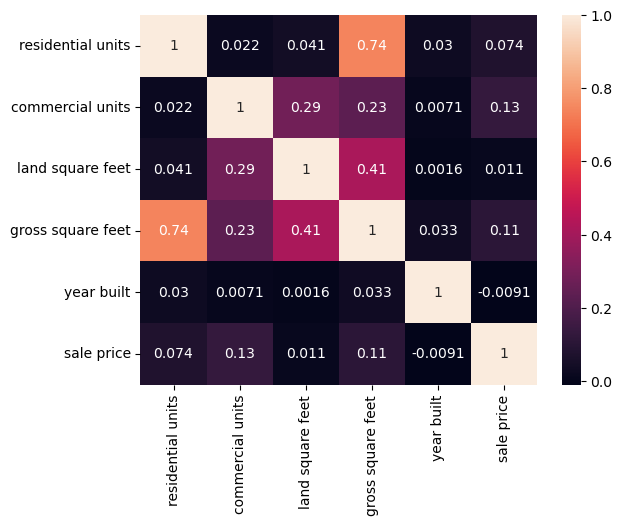

In [12]:
# Display the numerical relationship as matrix 
corr = housing.corr()
sns.heatmap(corr, annot=True)

This matrix help us to show the relationship among variables. We can see also correlated features with target variable. Gross square feet and residential unit is highly correlated with each other but these are not highly strong related with sale price variable. 

In [13]:
# lETS FIND THE RELATIONSHIP WITH SALE PRICE FEATURE
corr['sale price'].sort_values(ascending=False)

sale price           1.000000
commercial units     0.132758
gross square feet    0.107977
residential units    0.073996
land square feet     0.011413
year built          -0.009148
Name: sale price, dtype: float64

None of them are stronger relationship with target variable.

__Relationship between Gross Square Feet and Sale Price by Borough__

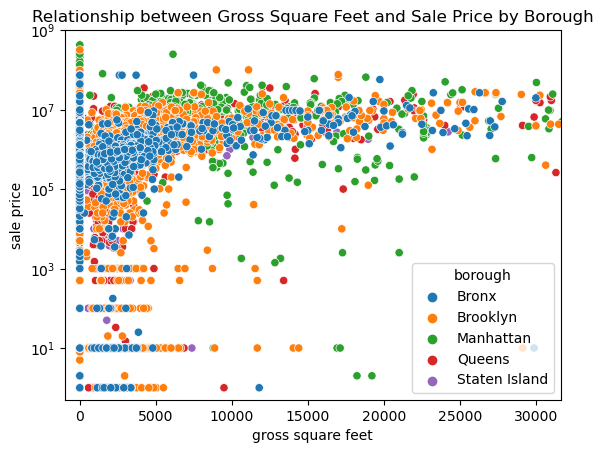

In [14]:
# Create a scatter plot
fig, ax = plt.subplots()

# Plotting the data with seaborn scatterplot
sns.scatterplot(x='gross square feet', y='sale price', data=housing, hue='borough')

# Set limits for the x and y axes
ax.set_xlim([-10**3, 10**4.5])  # Set limit for x-axis
ax.set_ylim([.5, 10**9])  # Set limit for y-axis

# Set the y-axis scale to logarithmic
ax.set_yscale("log")

# Add a title to the plot
ax.set_title("Relationship between Gross Square Feet and Sale Price by Borough")

# Display the plot
plt.show()

The scatter shows a positive correlation between gross square feet and sale price across all boroughs, with properties in Manhattan generally commanding higher sale prices at similar square footage compared to other boroughs.

__Relationship between Residential Units and Sale Price by Borough__

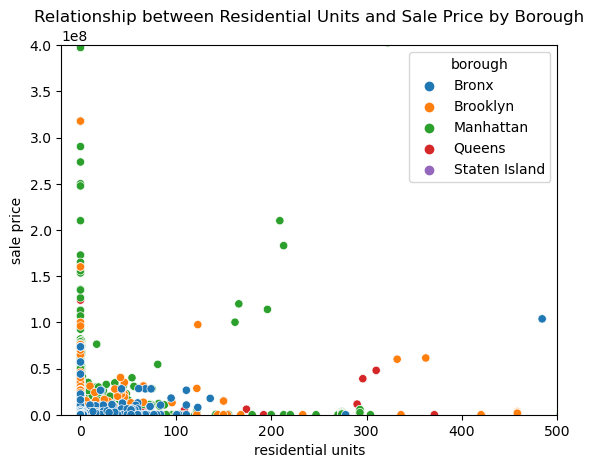

In [15]:
# Create a scatter plot
fig, ax = plt.subplots()

# Plotting the data with seaborn scatterplot
sns.scatterplot(x='residential units', y='sale price', data=housing, hue='borough')

# Set limits for the x and y axes
ax.set_xlim([-20, 500])  # Set limit for x-axis
ax.set_ylim([-1000, 0.4*(10**9)])  # Set limit for y-axis

# Set the y-axis scale to linear
ax.set_yscale("linear")

# Add a title to the plot
ax.set_title("Relationship between Residential Units and Sale Price by Borough")

# Display the plot
plt.show()

This scatter plot shows the relationship between the number of residential units and sale prices across NYC boroughs, showing a general trend where properties in Manhattan and the Bronx command higher prices, particularly as the number of residential units increases.

__Relationship between Commercial Units and Sale Price by Borough__

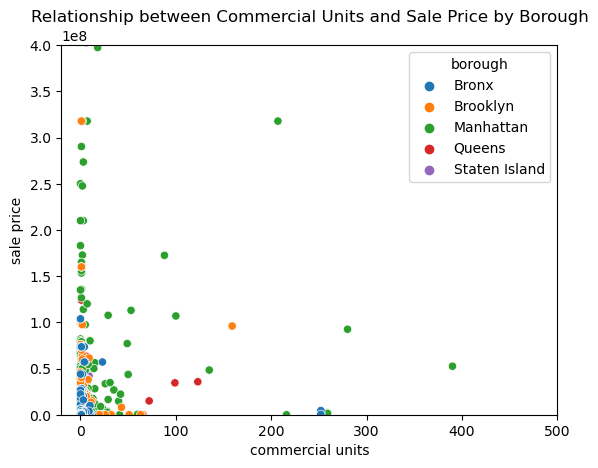

In [16]:
# Create a scatter plot
fig, ax = plt.subplots()

# Plotting the data with seaborn scatterplot
sns.scatterplot(x='commercial units', y='sale price', data=housing, hue='borough')

# Set limits for the x and y axes
ax.set_xlim([-20, 500])
ax.set_ylim([-1000, 0.4*(10**9)])

# Set the y-axis scale to linear
ax.set_yscale("linear")

# Add a title to the plot
ax.set_title("Relationship between Commercial Units and Sale Price by Borough")

# Display the plot
plt.show()

This scatter plot reveals that properties with commercial units in Manhattan generally command higher sale prices, reflecting its status as a premier location for commercial real estate in NYC.

__Exploring sale price__


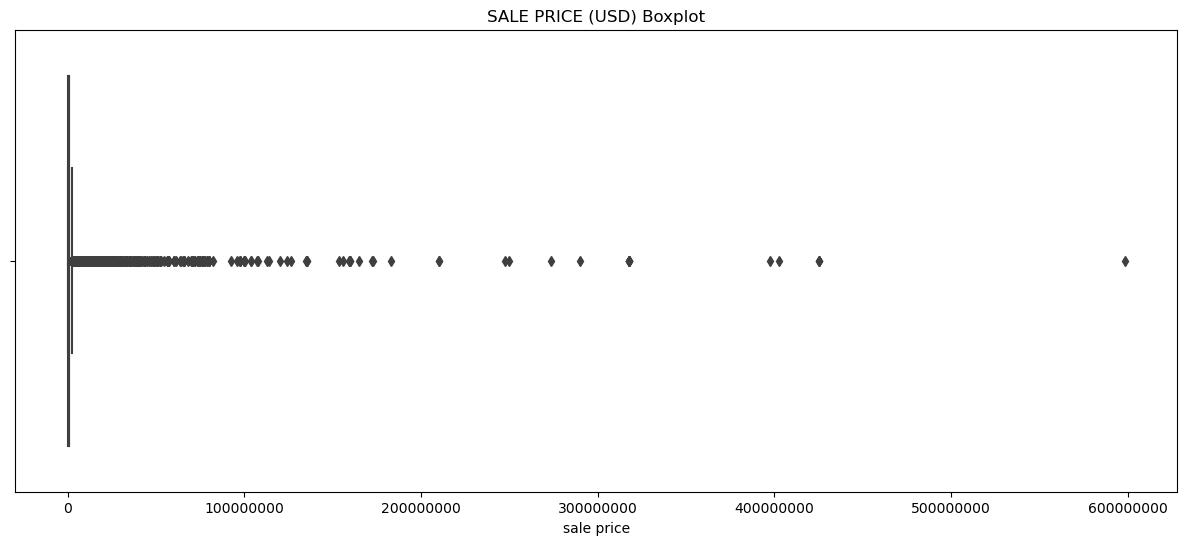

In [17]:
# Create a new figure with a specified size
plt.figure(figsize=(15,6))

# Plotting a boxplot of sale price
sns.boxplot(x='sale price', data=housing)

# Set tick labels format to plain style for the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Add a title to the plot
plt.title('SALE PRICE (USD) Boxplot')

# Display the plot
plt.show()

The boxplot shows that while most property sales cluster within a lower price range, there are numerous outliers indicating exceptionally high-value transactions.

In [18]:
# Filtering the 'housing' DataFrame to remove outliers based on sale price
# Keep only the rows where sale price is greater than 1000 and less than 5000000
housing = housing[(housing['sale price'] > 1000) & (housing['sale price'] < 5000000)]

# Output the shape of the DataFrame after removing outliers
print("Shape of housing DataFrame after removing outliers:", housing.shape)


Shape of housing DataFrame after removing outliers: (44644, 15)


The above code filters the 'housing' DataFrame to remove outliers by retaining only the properties with sale prices between 1,000 USD and 5,000,000 USD, resulting in a reduced dataset of 44,644 entries.

<Axes: xlabel='sale price', ylabel='Density'>

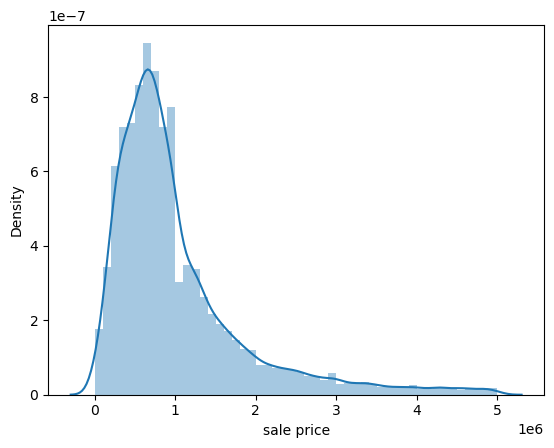

In [19]:
# Plot a distribution plot (histogram) of the 'sale price' column from the 'housing' DataFrame
sns.distplot(housing['sale price'])

The distribution plot for sale prices in our DataFrame, after removing outliers, shows a skewed distribution with most properties clustered at lower prices and a long tail extending towards higher values.

__Exploring Gross and Lad square feet__

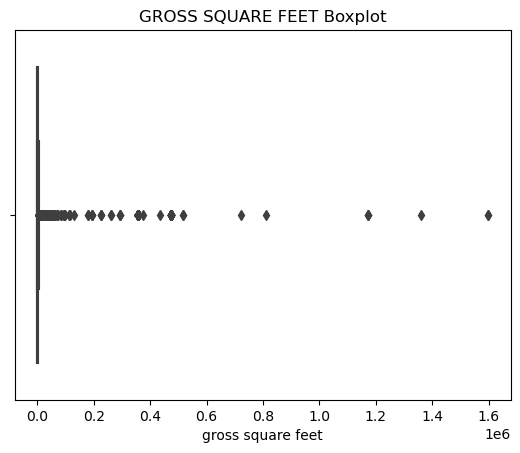

In [20]:
# Plotting a boxplot of gross square feet
sns.boxplot(x='gross square feet', data=housing)

# Adding a title to the plot
plt.title('GROSS SQUARE FEET Boxplot')

# Display the plot
plt.show();

The boxplot for gross square feet highlights that most properties have a small footprint, with a few outliers indicating properties with significantly larger gross square footage.

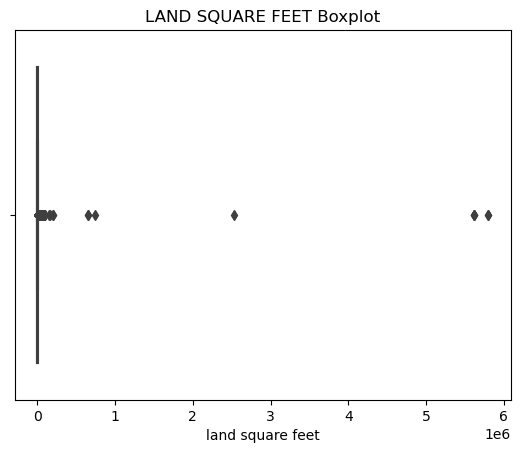

In [21]:
# Plotting a boxplot of land square feet
sns.boxplot(x='land square feet', data=housing)

# Adding a title to the plot
plt.title('LAND SQUARE FEET Boxplot')

# Display the plot
plt.show()

The boxplot for land square feet shows that most property plots are relatively small, with a few exceptions that represent significantly larger land areas.

In [22]:
# Filtering the 'housing' DataFrame to remove values exceeding certain thresholds
# Keep only the rows where 'gross square feet' is less than 12500
housing = housing[housing['gross square feet'] < 12500]

# Keep only the rows where 'land square feet' is less than 20000
housing = housing[housing['land square feet'] < 20000]


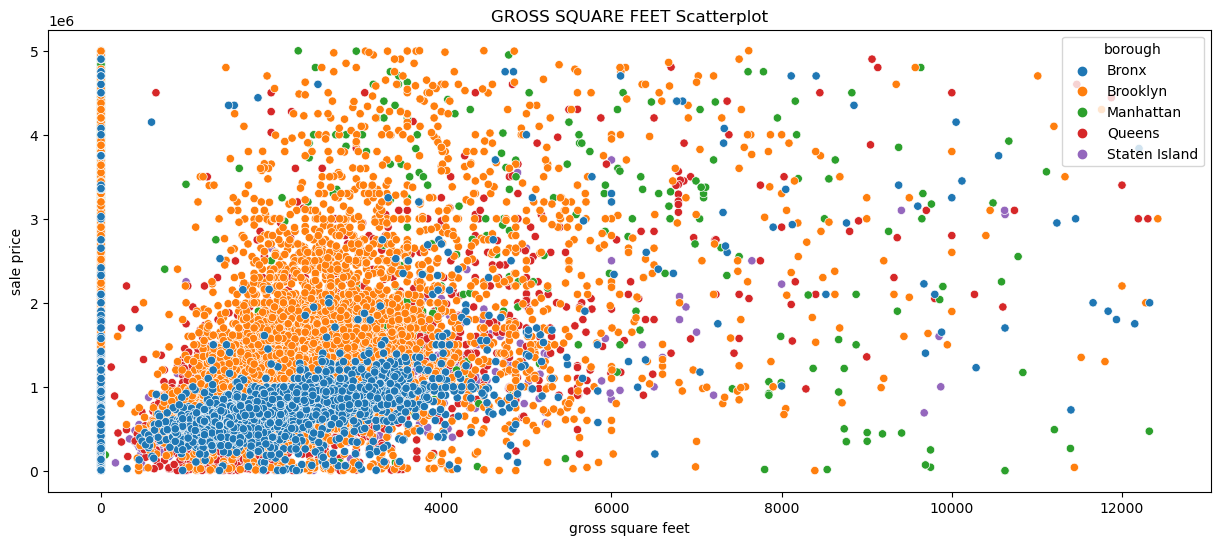

In [23]:
# Create a new figure with a specified size
plt.figure(figsize=(15,6))

# Plotting a scatter plot of 'gross square feet' vs 'sale price' with hue as 'borough'
sns.scatterplot(x='gross square feet', y='sale price', data=housing, hue='borough')

# Adding a title to the plot
plt.title('GROSS SQUARE FEET Scatterplot')

# Display the plot
plt.show();

The scatter plot displays a general trend where properties with larger gross square footage in Manhattan tend to have higher sale prices, compared to other boroughs where the relationship appears less pronounced.

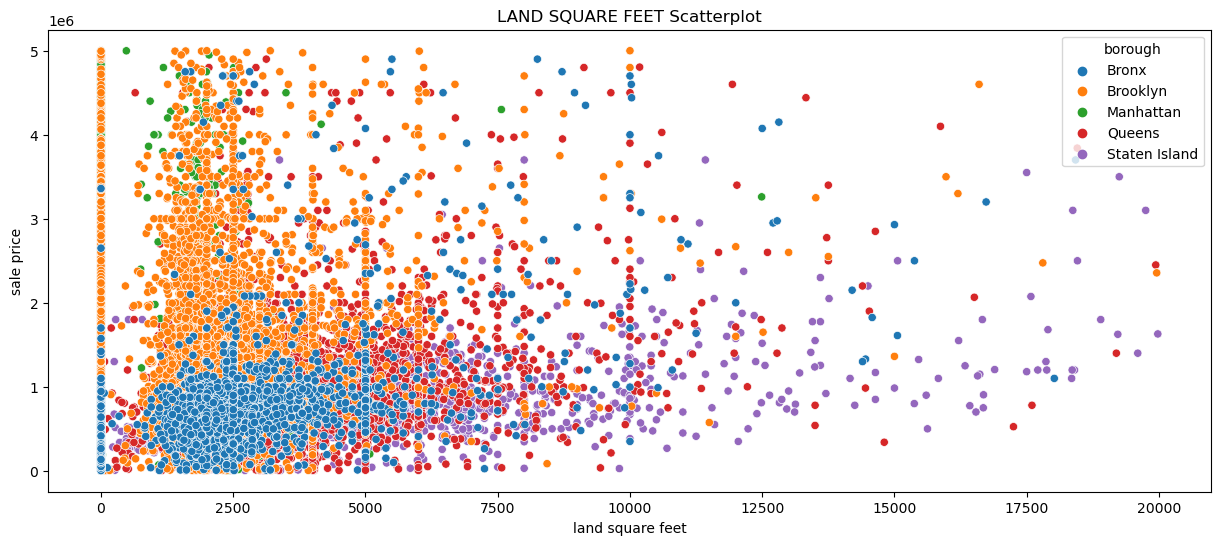

In [24]:
# Create a new figure with a specified size
plt.figure(figsize=(15,6))

# Plotting a scatter plot of 'land square feet' vs 'sale price' with hue as 'borough'
sns.scatterplot(x='land square feet', y='sale price', data=housing, hue='borough')

# Adding a title to the plot
plt.title('LAND SQUARE FEET Scatterplot')

# Display the plot
plt.show()

Properties in Queens and Staten Island frequently have larger land areas compared to those in Manhattan, yet their sale prices do not necessarily increase proportionally with land size, suggesting that factors other than land size might have a greater influence on property values in these boroughs.

__Exploring Residential and Commercial Units__

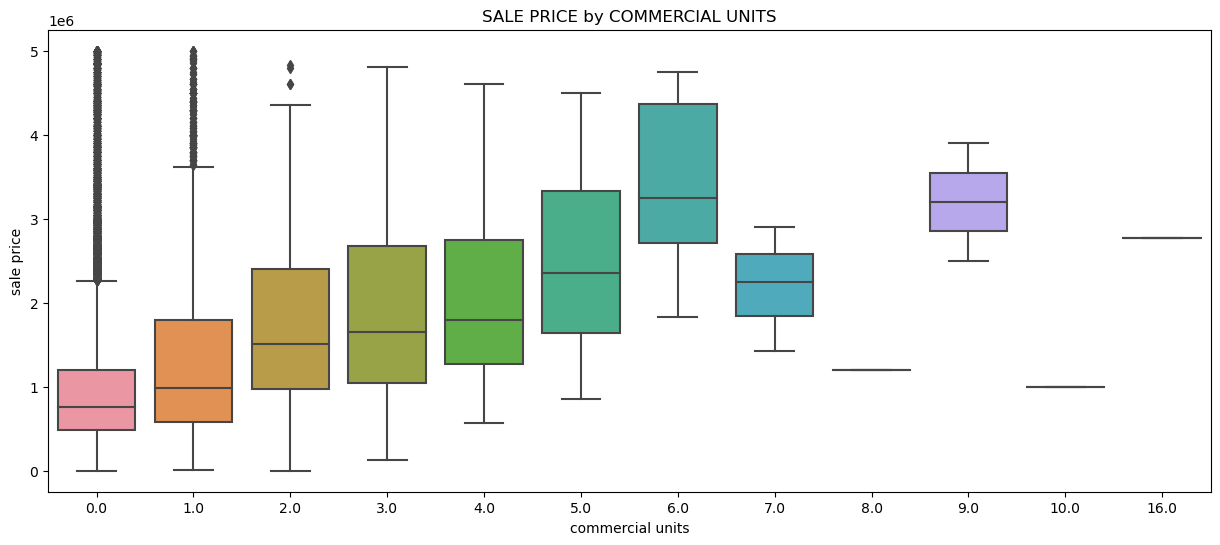

In [25]:
# Create a new figure with a specified size
plt.figure(figsize=(15,6))

# Plotting a boxplot of 'sale price' by 'commercial units'
sns.boxplot(x='commercial units', y='sale price', data=housing)

# Adding a title to the plot
plt.title('SALE PRICE by COMMERCIAL UNITS')

# Display the plot
plt.show();

Properties with 5 to 7 commercial units demonstrate notably higher median sale prices, indicating a potential premium value for properties within this range of commercial utilization.

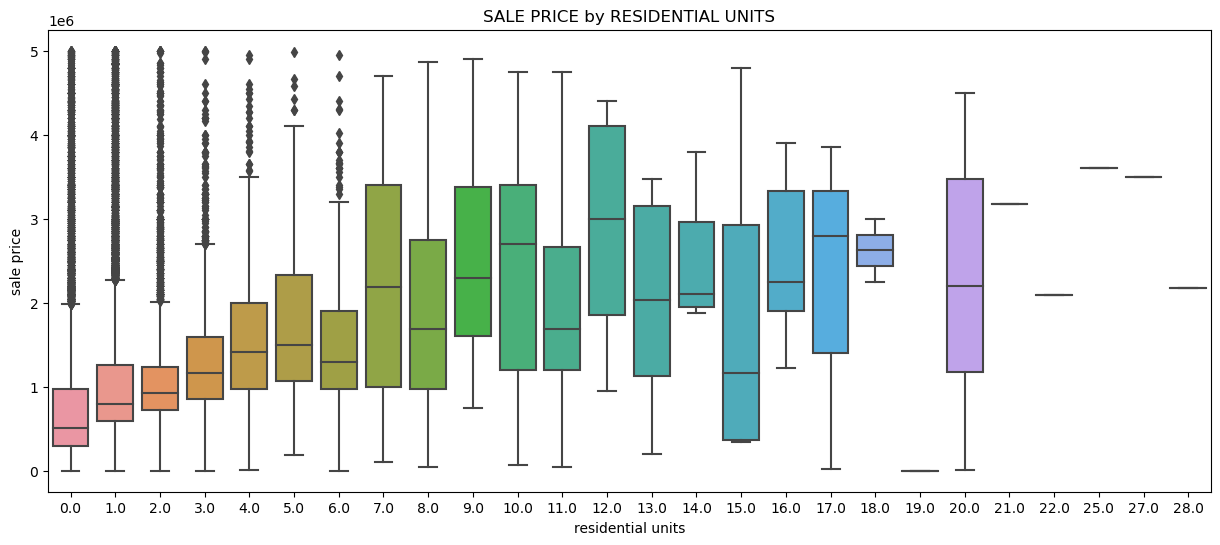

In [26]:
# Create a new figure with a specified size
plt.figure(figsize=(15,6))

# Plotting a boxplot of 'sale price' by 'residential units'
sns.boxplot(x='residential units', y='sale price', data=housing)

# Adding a title to the plot
plt.title('SALE PRICE by RESIDENTIAL UNITS')

# Display the plot
plt.show();

The sale prices increase notably as the number of residential units grows, particularly peaking at around 18 units, which suggests that mid-sized residential buildings may command higher market values compared to both smaller and significantly larger properties.

__Exploring Categorical Variables__

In [27]:
# Selecting columns with non-numeric (categorical) data from the 'housing' DataFrame
cat_df = housing.select_dtypes(exclude=[np.number])

# Generating descriptive statistics for the categorical columns
cat_df.describe()

borough    neighborhood         building class category  \
count    44121           44121                           44121   
unique       5             251                              40   
top     Queens  FLUSHING-NORTH  10 COOPS - ELEVATOR APARTMENTS   
freq     13920            1643                            9514   
first      NaN             NaN                             NaN   
last       NaN             NaN                             NaN   

       tax class at present building class at present apartment number  \
count                 44121                     44121            44121   
unique                   11                       109             2807   
top                       2                        D4                0   
freq                  20614                      9355            32455   
first                   NaN                       NaN              NaN   
last                    NaN                       NaN              NaN   

        tax class at time of sale building class at time of sale  \
count                     44121.0                          44121   
unique                        3.0                            108   
top                           2.0                             D4   
freq                      23065.0                           9355   
first                         NaN                            NaN   
last                          NaN                            NaN   

                  sale date  
count                 44121  
unique                  311  
top     2023-03-31 00:00:00  
freq                    418  
first   2023-01-01 00:00:00  
last    2023-12-30 00:00:00

__Borough and Neighborhood__

In [28]:
# Creating a pivot table to calculate the mean sale price for each combination of 'borough' and 'neighborhood'
pivot_neighbourhood = housing.pivot_table(index=['borough', 'neighborhood'], values='sale price', aggfunc=np.mean)
pivot_neighbourhood

sale price
borough       neighborhood                      
Bronx         BATHGATE              7.333074e+05
              BAYCHESTER            6.510455e+05
              BEDFORD PARK/NORWOOD  7.545045e+05
              BELMONT               1.061667e+06
              BRONXDALE             5.877389e+05
...                                          ...
Staten Island TRAVIS                5.649782e+05
              WEST NEW BRIGHTON     6.600561e+05
              WESTERLEIGH           7.128858e+05
              WILLOWBROOK           7.435294e+05
              WOODROW               7.306710e+05

[252 rows x 1 columns]

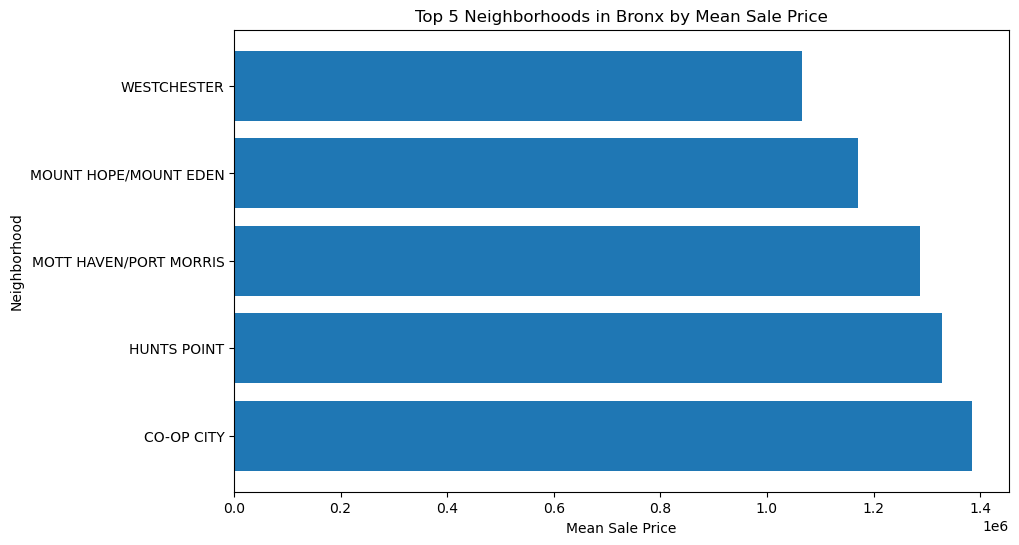

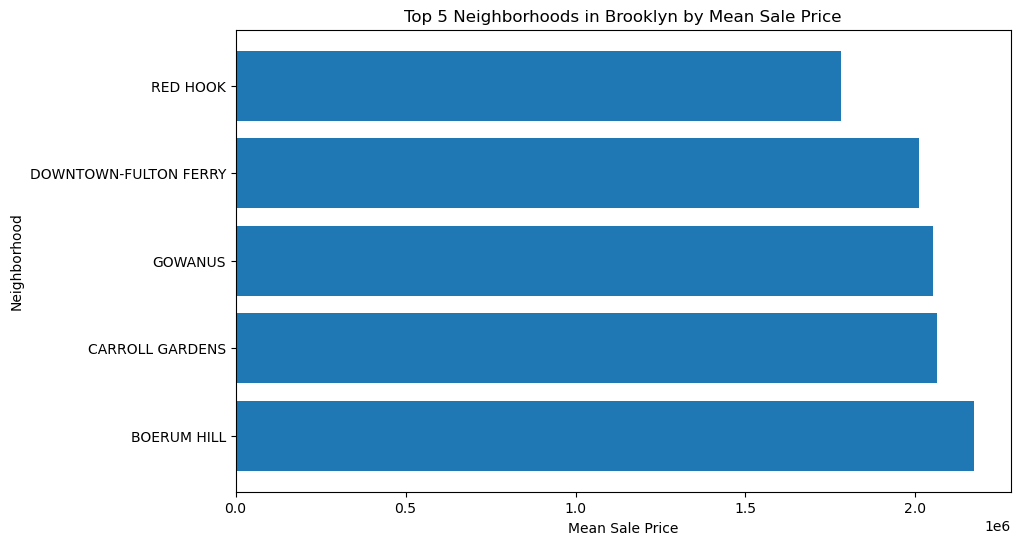

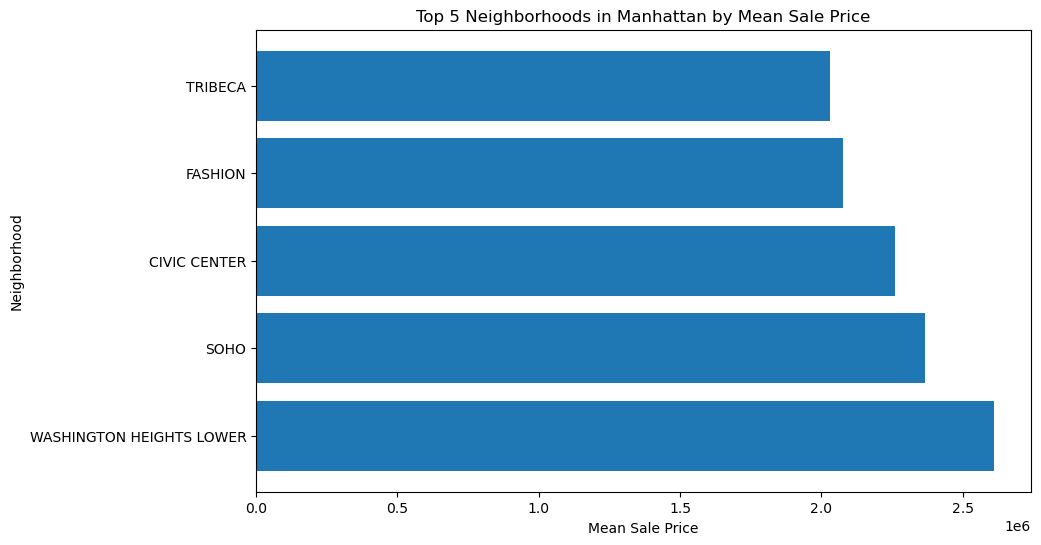

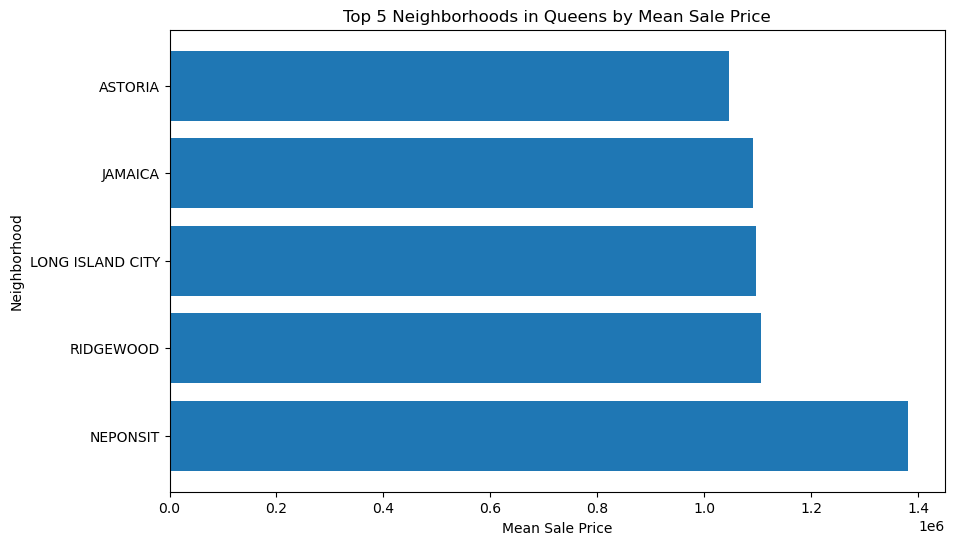

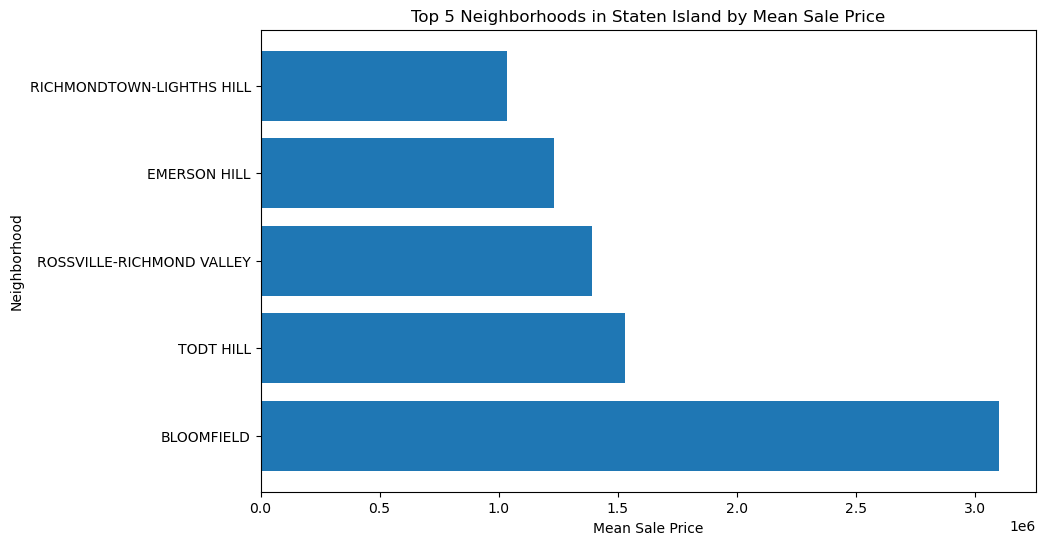

In [29]:
# Create a pivot table to calculate the mean sale price for each combination of 'borough' and 'neighborhood'
pivot_neighbourhood = housing.pivot_table(index=['borough', 'neighborhood'], values='sale price', aggfunc=np.mean)

# Plotting for each borough
for borough in pivot_neighbourhood.index.levels[0]:
    # Get the top 5 neighborhoods for the current borough based on mean sale price
    top_5_neighborhoods = pivot_neighbourhood.loc[borough].nlargest(5, 'sale price')

    # Plotting a horizontal bar plot for the top 5 neighborhoods
    plt.figure(figsize=(10, 6))
    plt.barh(top_5_neighborhoods.index, top_5_neighborhoods['sale price'])
    plt.xlabel('Mean Sale Price')
    plt.ylabel('Neighborhood')
    plt.title(f'Top 5 Neighborhoods in {borough} by Mean Sale Price')
    plt.show();

These bar charts display the top 5 neighborhoods with the highest mean sale prices across each NYC borough, highlighting Astoria in Queens and Tribeca in Manhattan as the most expensive on average in their respective boroughs.

In [30]:
# Creating a pivot table to calculate the mean sale price for each borough
pivot_borough = housing.pivot_table(index=['borough'], values='sale price', aggfunc=np.mean)
pivot_borough
     

sale price
borough                    
Bronx          6.525838e+05
Brooklyn       1.165245e+06
Manhattan      1.431646e+06
Queens         7.528354e+05
Staten Island  6.788935e+05

In [31]:
# Create a pivot table to calculate the mean sale price for each borough, then sort by sale price in descending order
pivot_borough_sorted = housing.pivot_table(index=['borough'], values='sale price', aggfunc=np.mean).sort_values(by='sale price', ascending=False)

# Create a bar trace for the plot
trace = go.Bar(
    x=pivot_borough_sorted.index,  # x-axis: borough names
    y=pivot_borough_sorted['sale price'],  # y-axis: average sale price
    marker=dict(color=plt.cm.tab10(np.linspace(0, 1, len(pivot_borough_sorted))))  # Color mapping for bars
)

# Create layout for the plot
layout = go.Layout(
    title='Average Sale Price in Each Borough (Sorted)',  # Plot title
    xaxis=dict(title='Borough'),  # x-axis label
    yaxis=dict(title='Average Sale Price'),  # y-axis label
)

# Create a figure combining trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show();

Manhattan exhibits the highest average sale price among the NYC boroughs, significantly surpassing Brooklyn, the second highest, with Queens, Staten Island, and the Bronx following in descending order.

__Building Class Category__

In [32]:
# Create a pivot table to calculate the mean sale price for each building class category
pivot_build_cat = housing.pivot_table(index=['building class category'], values='sale price', aggfunc=np.mean)

# Select the top 5 building class categories with the highest mean sale price
top_5_build_cat = pivot_build_cat.nlargest(5, 'sale price')

# Plotting with Plotly
# Create a bar plot using Plotly Express
fig = px.bar(
    top_5_build_cat,  # DataFrame containing the data to be plotted
    x=top_5_build_cat.index,  # x-values: building class category names
    y='sale price',  # y-values: mean sale price
    color=top_5_build_cat.index,  # Color by building class category
    labels={'sale price': 'Mean Sale Price', 'index': 'Building Class Category'},  # Set axis labels
    title='Top 5 Building Class Categories by Mean Sale Price'  # Set plot title
)

# Update x-axis properties to order categories by total descending and rotate labels for better readability
fig.update_xaxes(categoryorder='total descending', tickangle=45)

# Show the plot
fig.show();


The bar chart shows that among the top five building class categories by mean sale price in NYC, "Rentals - Elevator Apartments" command the highest prices, followed closely by theaters and warehouses.

In [33]:
# Create a pivot table to calculate the mean sale price for each building class at present
pivot_build_cat_pres = housing.pivot_table(index=['building class at present'], values='sale price', aggfunc=np.mean)

# Sort the pivot table by sale price in descending order and select the top 5
top_5_build_cat_pres = pivot_build_cat_pres.nlargest(5, 'sale price')

# Plotting with Plotly
# Create a bar plot using Plotly Express
fig = px.bar(
    top_5_build_cat_pres,  # DataFrame containing the data to be plotted
    x=top_5_build_cat_pres.index,  # x-values: building class at present names
    y='sale price',  # y-values: mean sale price
    labels={'sale price': 'Mean Sale Price', 'index': 'Building Class at Present'},  # Set axis labels
    title='Top 5 Building Classes at Present by Mean Sale Price'  # Set plot title
)

# Update x-axis properties to order categories by total descending and rotate labels for better readability
fig.update_xaxes(categoryorder='total descending', tickangle=45)

# Show the plot
fig.show();

The bar chart shows the top five building classes in terms of mean sale price, effectively highlighting which property types currently command the highest market values in New York City.

In [34]:
pivot_build_cat_pres = housing.pivot_table(index=['building class at time of sale'], values='sale price', aggfunc=np.mean)

# Sort the pivot table by sale price in descending order and select the top 5
top_5_build_cat_pres = pivot_build_cat_pres.nlargest(5, 'sale price')

# Plotting with Plotly
# Create a bar plot using Plotly Express
fig = px.bar(
    top_5_build_cat_pres,  # DataFrame containing the data to be plotted
    x=top_5_build_cat_pres.index,  # x-values: building class at time of sale names
    y='sale price',  # y-values: mean sale price
    color=top_5_build_cat_pres.index,  # Color by building class at time of sale
    labels={'sale price': 'Mean Sale Price', 'index': 'Building Class at time of sale'},  # Set axis labels
    title='Top 5 Building Classes at time of sale by Mean Sale Price'  # Set plot title
)

# Update x-axis properties to order categories by total descending and rotate labels for better readability
fig.update_xaxes(categoryorder='total descending', tickangle=45)

# Show the plot
fig.show()

The bar chart showcases the top five building classes at the time of sale, ordered by mean sale price, revealing a significant variance in property values across different classifications in New York City.

__Tax Class__

In [35]:
# Create a pivot table to calculate the mean sale price for each tax class at present
pivot_tax_pres = housing.pivot_table(index=['tax class at present'], values='sale price', aggfunc=np.mean)

# Plotting with Plotly
# Create a bar plot using Plotly Express
fig = px.bar(
    pivot_tax_pres,  # DataFrame containing the data to be plotted
    x=pivot_tax_pres.index,  # x-values: tax class at present names
    y='sale price',  # y-values: mean sale price
    labels={'sale price': 'Mean Sale Price', 'index': 'Tax Class at Present'},  # Set axis labels
    title='Mean Sale Price by Tax Class at Present'  # Set plot title
)

# Update x-axis properties to order categories by total ascending
fig.update_xaxes(categoryorder='total ascending')

# Show the plot
fig.show();

Properties classified under tax class 2B command the highest average sale prices, indicating a premium valuation likely due to the specific characteristics or favorable conditions associated with this tax classification.

In [36]:
# Create a pivot table to calculate the mean sale price for each tax class at time of sale
pivot_tax_pres = housing.pivot_table(index=['tax class at time of sale'], values='sale price', aggfunc=np.mean)

# Plotting with Plotly
# Create a bar plot using Plotly Express
fig = px.bar(
    pivot_tax_pres,  # DataFrame containing the data to be plotted
    x=pivot_tax_pres.index,  # x-values: tax class at time of sale names
    y='sale price',  # y-values: mean sale price
    labels={'sale price': 'Mean Sale Price', 'index': 'Tax Class at time of sale'},  # Set axis labels
    title='Mean Sale Price by Tax Class at time of sale'  # Set plot title
)

# Update x-axis properties to order categories by total ascending
fig.update_xaxes(categoryorder='total ascending')

# Show the plot
fig.show();

The bar chart indicates that properties in the highest tax class at the time of sale, represented by the number 4, command the highest mean sale prices, demonstrating the impact of tax classification on property values.

__Sale Date__

In [37]:
# Convert the 'sale date' column to datetime
housing['sale date'] = pd.to_datetime(housing['sale date'])

# Resample the data to monthly intervals and calculate the mean sale price
pivot_date = housing.resample('M', on='sale date').mean()

# Plotting with Plotly
# Create a line plot using Plotly Express
fig = px.line(
    pivot_date,  # DataFrame containing the data to be plotted
    x=pivot_date.index,  # x-values: sale date
    y='sale price',  # y-values: mean sale price
    labels={'sale price': 'Mean Sale Price', 'sale date': 'Sale Date'},  # Set axis labels
    title='Mean Sale Price Over Time (Monthly)'  # Set plot title
)

# Show the plot
fig.show();

The line chart illustrates the fluctuations in mean sale prices over several months in 2023, showing a notable decline from March to July followed by a recovery peaking in November.

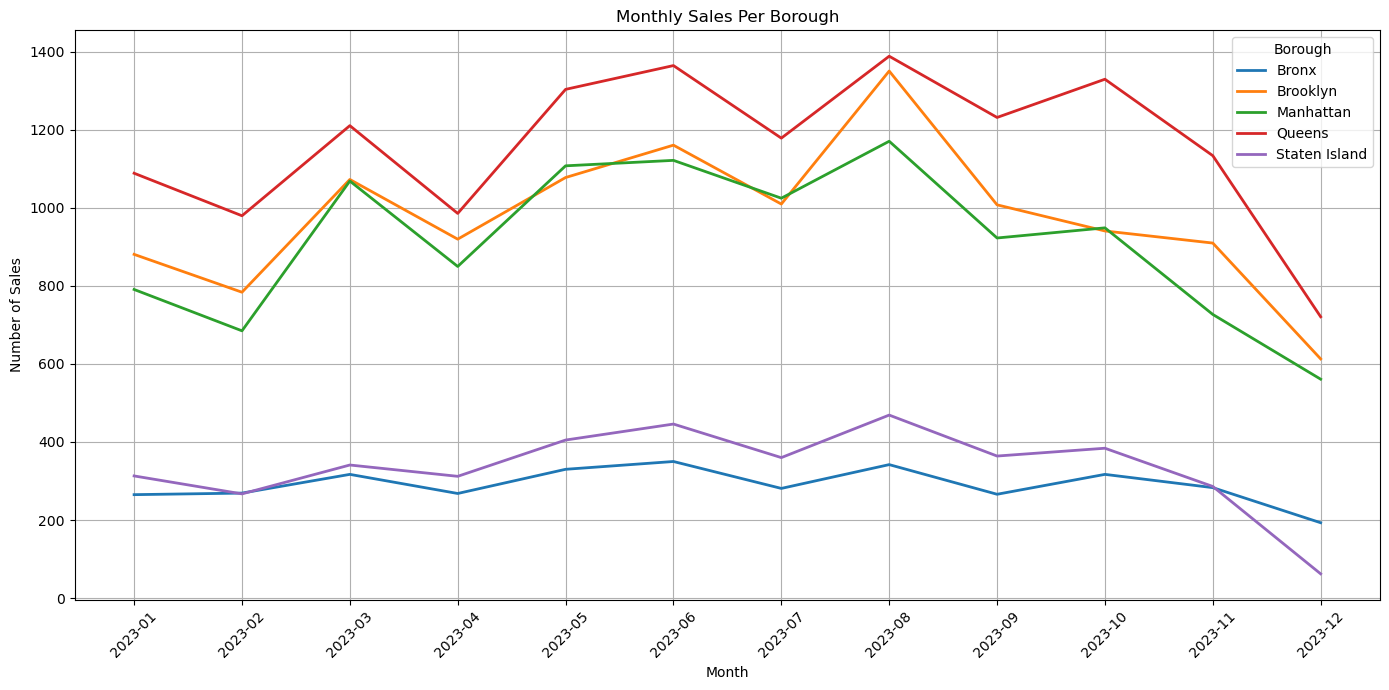

In [38]:
# Ensure 'sale_date' is a datetime type
housing['sale date'] = pd.to_datetime(housing['sale date'])

# Extract year and month from 'sale_date'
housing['year_month'] = housing['sale date'].dt.to_period('M')

# Group by 'borough' and 'year_month' and count sales
monthly_sales = housing.groupby(['borough', 'year_month']).size().unstack(level=0)

# Plotting
plt.figure(figsize=(14, 7))

# Iterate over each column (borough) in the DataFrame and plot monthly sales
for column in monthly_sales.columns:
    plt.plot(monthly_sales.index.astype(str), monthly_sales[column], marker='', linewidth=2, label=column)

plt.title('Monthly Sales Per Borough')  # Set plot title
plt.xlabel('Month')  # Set x-axis label
plt.ylabel('Number of Sales')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Borough')  # Add legend with title for borough
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show();

The line chart shows a distinct peak in sales for Manhattan in the early months, with a notable decline afterwards, whereas sales trends in other boroughs such as Brooklyn, Queens, and Staten Island appear more consistent over time, suggesting seasonal or event-driven fluctuations in the Manhattan real estate market.

# Data Preparation

## Identify missing values

In [39]:
housing.isna().sum()

borough                           0
neighborhood                      0
building class category           0
tax class at present              0
building class at present         0
apartment number                  0
residential units                 0
commercial units                  0
land square feet                  0
gross square feet                 0
year built                        0
tax class at time of sale         0
building class at time of sale    0
sale price                        0
sale date                         0
year_month                        0
dtype: int64

<Axes: >

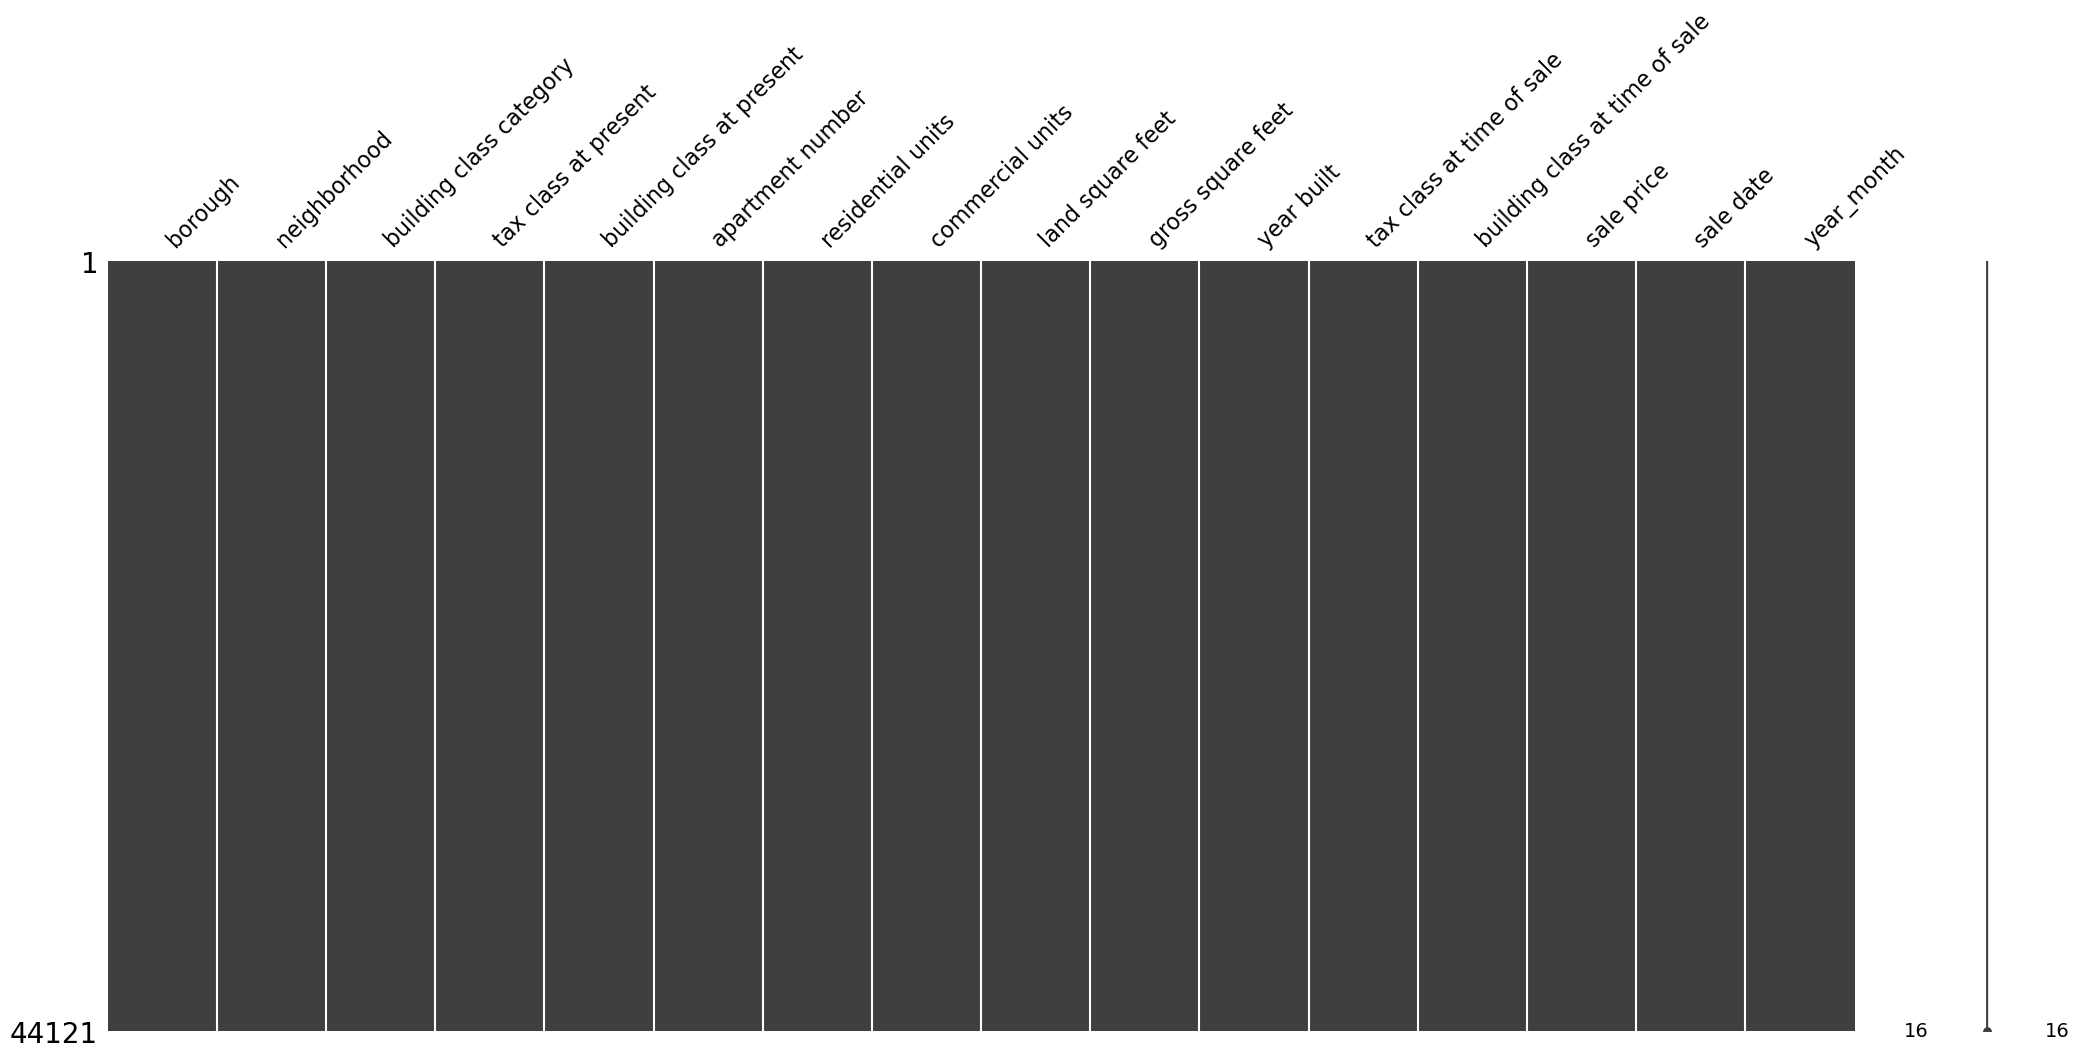

In [40]:
msno.matrix(housing)

There is no missing values

### Normalization of numerical variables

__one-hot encoding for the categorical variables__

In [41]:
# Delete the columns that we dont use further
del housing['apartment number']
del housing['sale date']

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44121 entries, 1 to 70839
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype    
---  ------                          --------------  -----    
 0   borough                         44121 non-null  category 
 1   neighborhood                    44121 non-null  object   
 2   building class category         44121 non-null  object   
 3   tax class at present            44121 non-null  category 
 4   building class at present       44121 non-null  object   
 5   residential units               44121 non-null  float64  
 6   commercial units                44121 non-null  float64  
 7   land square feet                44121 non-null  float64  
 8   gross square feet               44121 non-null  float64  
 9   year built                      44121 non-null  float64  
 10  tax class at time of sale       44121 non-null  category 
 11  building class at time of sale  44121 non-null  object   
 12  sale

In [43]:
# Select the numerical features
num_data = housing.select_dtypes(include=[np.number])
num_data.columns

Index(['residential units', 'commercial units', 'land square feet',
       'gross square feet', 'year built', 'sale price'],
      dtype='object')

__Log Transforming and Scaling the Data__

In [44]:
# Determine skewness for numerical features
skewed_ft = housing[num_data.columns].apply(lambda x: skew(x.dropna().astype(float)))

# Select features with skewness greater than 0.75
skewed_ft = skewed_ft[skewed_ft > 0.75]

# Retrieve the index (feature names) of the skewed features
skewed_ft = skewed_ft.index

In [45]:
housing[skewed_ft] = np.log1p(housing[skewed_ft]) #log(x+1) transform (normalizes features and accounts for zeros)

In [46]:
#Scaling features
scaler = StandardScaler()
scaled_ft = scaler.fit_transform(df[num_data.columns])

In [47]:
#Replacing df numerical column data with scaled data
for i, col in enumerate(num_data.columns):
       df[col] = scaled_ft[:,i]

__One-Hot Encoding Categorical Variables__

In [48]:
# List of categorical features related to real estate data
cat_features = ['borough', 'neighborhood', 'building class category', 'tax class at present', 'building class at present', 
                'building class at time of sale', 'tax class at present', 'tax class at time of sale']
     

In [49]:
# One-hot encode the categorical features
one_hot_enc = pd.get_dummies(housing[cat_features])

# Display information about the resulting DataFrame
one_hot_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44121 entries, 1 to 70839
Columns: 538 entries, borough_Bronx to tax class at time of sale_4
dtypes: uint8(538)
memory usage: 23.0 MB


In [50]:
# Drop the original categorical columns from housing
final_df = housing.drop(cat_features, axis=1)

# Concatenate final_df with the one-hot encoded DataFrame
final_df = pd.concat([final_df, one_hot_enc], axis=1)

In [51]:
# Show the first 5 observation of the dataset
final_df.head()

residential units  commercial units  land square feet  gross square feet  \
1           0.693147               0.0          9.207236           8.279190   
2           0.693147               0.0          8.517393           7.696667   
3           0.693147               0.0          9.010791           7.650169   
5           0.693147               0.0          8.922792           7.192182   
6           0.693147               0.0          8.517393           7.427144   

   year built  sale price year_month  borough_Bronx  borough_Brooklyn  \
1      1990.0   14.058458    2023-03              0                 0   
2      1940.0   13.864302    2023-06              0                 0   
3      1980.0   12.861001    2023-02              0                 0   
5      1930.0   13.518453    2023-07              0                 0   
6      1960.0   13.369225    2023-04              0                 0   

   borough_Manhattan  ...  tax class at present_1C  tax class at present_1D  \
1                  0  ...                        0                        0   
2                  0  ...                        0                        0   
3                  0  ...                        0                        0   
5                  0  ...                        0                        0   
6                  0  ...                        0                        0   

   tax class at present_2  tax class at present_2A  tax class at present_2B  \
1                       0                        0                        0   
2                       0                        0                        0   
3                       0                        0                        0   
5                       0                        0                        0   
6                       0                        0                        0   

   tax class at present_2C  tax class at present_4  \
1                        0                       0   
2                        0                       0   
3                        0                       0   
5                        0                       0   
6                        0                       0   

   tax class at time of sale_1  tax class at time of sale_2  \
1                            1                            0   
2                            1                            0   
3                            1                            0   
5                            1                            0   
6                            1                            0   

   tax class at time of sale_4  
1                            0  
2                            0  
3                            0  
5                            0  
6                            0  

[5 rows x 545 columns]

# Data Prepped Review

In [52]:
# Check if 'total_units' exists and if not, create it
if 'total_units' not in final_df.columns:
    final_df['total_units'] = final_df['residential units'] + final_df['commercial units']

# Calculate the proportion of commercial units
final_df['commercial_unit_proportion'] = final_df['commercial units'] / final_df['total_units']

# Ensure there are no divisions by zero
final_df['commercial_unit_proportion'] = final_df['commercial_unit_proportion'].fillna(0)

In [53]:
# Convert the entire DataFrame to numeric data types
numeric_df = final_df.apply(pd.to_numeric, errors='coerce')

# Check the data types of the new DataFrame
numeric_df.dtypes


residential units              float64
commercial units               float64
land square feet               float64
gross square feet              float64
year built                     float64
                                ...   
tax class at time of sale_1      uint8
tax class at time of sale_2      uint8
tax class at time of sale_4      uint8
total_units                    float64
commercial_unit_proportion     float64
Length: 547, dtype: object

In [54]:
# Display summary statistics for the prepped data
housing.describe()


residential units  commercial units  land square feet  \
count       44121.000000      44121.000000      44121.000000   
mean            0.573122          0.051063          3.556360   
std             0.484675          0.197344          3.948285   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%             0.693147          0.000000          0.000000   
75%             0.693147          0.000000          7.811568   
max             3.367296          2.833213          9.902487   

       gross square feet    year built    sale price  
count       44121.000000  44121.000000  44121.000000  
mean            3.271843   1831.599556     13.530757  
std             3.762571    475.689080      0.835326  
min             0.000000      0.000000      7.003974  
25%             0.000000   1924.000000     13.112315  
50%             0.000000   1949.000000     13.560620  
75%             7.436617   1972.000000     14.026582  
max             9.427224   2023.000000     15.424948

**Summary Statistics Review:**
The table above provides a comprehensive overview of the central tendency and dispersion for each feature post-preparation. 


# Machine learning model

__Train/Test Split__

In [55]:
# Extract the target variable 'sale price' into Y_df
Y_df = numeric_df['sale price']

# Extract the features into X_df, dropping the 'sale price' column
X_df = numeric_df.drop('sale price', axis=1)

# Check the shapes of X_df and Y_df
X_df.shape, Y_df.shape

((44121, 546), (44121,))

In [56]:
# Split the feature and target dataframes, respectively
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)


In [57]:
# Define Root mean square error as function
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

__1. Linear Regression__

In [58]:
# Create an instance of SimpleImputer to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Linear Regressor
# Create and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, Y_train)

# Make predictions on the test set
Y_pred_lr = lin_reg.predict(X_test_imputed)
# Calculate the RMSE and R2 score
rmse_lr = rmse(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

# Printing Results

print("Linear Regression RMSE:", rmse_lr)
print('Linear Regresson R2:', r2_lr)


Linear Regression RMSE: 992198.4944519073
Linear Regresson R2: -1396085163552.0444


Performs very poor on test data.

__2. Decision Tree Regressor__

In [59]:
# Instantiate the Decision Tree Regressor with a random state for reproducibility
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor on the training data
dt_reg.fit(X_train, Y_train)

# Predict the target variable using the trained model on the test data
Y_pred_dt = dt_reg.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) between the actual and predicted values
rmse_dt = rmse(Y_test, Y_pred_dt)

# Calculate R-squared (R2) score to evaluate the model's performance
r2_dt = r2_score(Y_test, Y_pred_dt)

# Printing results
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree RMSE: 0.6945336629286015
Decision Tree R2: 0.3159286771039288


Decision tree's performance metric result is better than Linear regression because data was scattered, not in normal distribution and decision tree model works better performance when data is not normally distributed.

__3. Random Forest Regressor__

In [60]:
# Initialize the RandomForestRegressor with hyperparameters
rf_reg = RandomForestRegressor(random_state=42,
                               n_estimators=500,
                               max_depth=3)

# Train the Random Forest Regressor on the training data
rf_reg.fit(X_train, Y_train)

# Predict the target variable using the trained model on the test data
Y_pred_rf = rf_reg.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) between the actual and predicted values
rmse_rf = rmse(Y_test, Y_pred_rf)

# Calculate R-squared (R2) score to evaluate the model's performance
r2_rf = r2_score(Y_test, Y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 0.7174186692604265
Random Forest R2: 0.27010543045502966


In [61]:
# Get feature importances for Decision Tree
dt_feature_importances = dt_reg.feature_importances_

# Get feature importances for Random Forest
rf_feature_importances = rf_reg.feature_importances_

# Combine feature importances from all models
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Decision Tree': dt_feature_importances,
    'Random Forest': rf_feature_importances
})

# Calculate mean feature importance across models
feature_importances['Mean Importance'] = feature_importances.mean(axis=1)

# Sort by mean importance and select top 10 features
top_10_features = feature_importances.sort_values(by='Mean Importance', ascending=False).head(10)

print("Top 10 Most Important Features:")
top_10_features


Top 10 Most Important Features:


Feature  Decision Tree  Random Forest  Mean Importance
8         borough_Manhattan       0.145072       0.434072         0.289572
544             total_units       0.113076       0.311298         0.212187
3         gross square feet       0.119733       0.160517         0.140125
4                year built       0.138398       0.001282         0.069840
2          land square feet       0.066149       0.003530         0.034840
308  tax class at present_2       0.015070       0.020847         0.017959
7          borough_Brooklyn       0.031373       0.001291         0.016332
0         residential units       0.003143       0.018105         0.010624
536  tax class at present_2       0.002290       0.018921         0.010606
312  tax class at present_4       0.009143       0.002731         0.005937

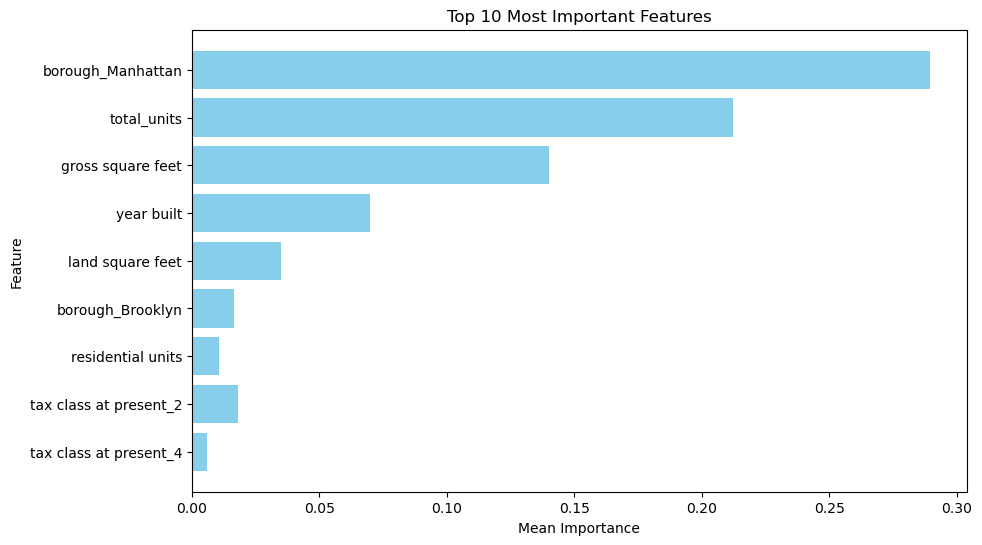

In [62]:
# Sort the top 10 features by mean importance
top_10_features_sorted = top_10_features.sort_values(by='Mean Importance', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_sorted['Feature'], top_10_features_sorted['Mean Importance'], color='skyblue')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


__Apply top 10 feature in Random Forest Model with hyperparameter__

In [63]:
# Get indices of top 10 features
top_10_indices = np.argsort(rf_feature_importances)[-10:]

# Get the names of top 10 features
top_10_features = [X_train.columns[i] for i in top_10_indices]

# Create a new DataFrame using only the top 10 features
X_train_top_10 = X_train[top_10_features]

# Initialize and train a new RandomForestRegressor model using only the top 10 features
rf_reg_top_10 = RandomForestRegressor(random_state=42, n_estimators=500,max_depth=3)
rf_reg_top_10.fit(X_train, Y_train)


RandomForestRegressor(max_depth=3, n_estimators=500, random_state=42)

We have used hyperparameter tuning in Random forest with different depth of the tree 2-4, number of estimators from 100-500, also random state 0,20, 42. But at the end we conclude that these parameters gave us best result on our top 10 features. 

In [64]:
# Predict the target variable using the trained model on the test data
Y_pred_rf = rf_reg_top_10.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) between the actual and predicted values
rmse_rf = rmse(Y_test, Y_pred_rf)

# Calculate R-squared (R2) score to evaluate the model's performance
r2_rf = r2_score(Y_test, Y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 0.7174186692604265
Random Forest R2: 0.27010543045502966


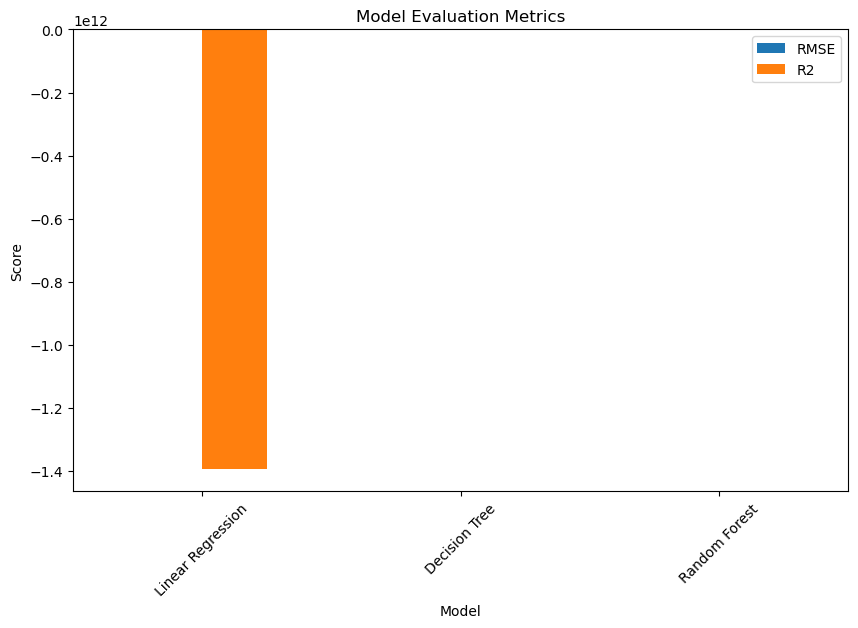

RMSE            R2
Linear Regression  992198.494452 -1.396085e+12
Decision Tree           0.694534  3.159287e-01
Random Forest           0.717419  2.701054e-01

In [65]:
# Calculate RMSE and R2 scores for each model
scores = {
    "Linear Regression": (rmse_lr, r2_lr),
    "Decision Tree": (rmse_dt, r2_dt),
    "Random Forest": (rmse_rf, r2_rf)
}

# Create a dataframe from the scores
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['RMSE', 'R2'])

# Plot the scores
scores_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

scores_df


Overall, based on these scores, the Random Forest model appears to be the best-performing model among the three, followed by the Decision Tree model. The Linear Regression model seems to perform the worst.

__Residual Plot__

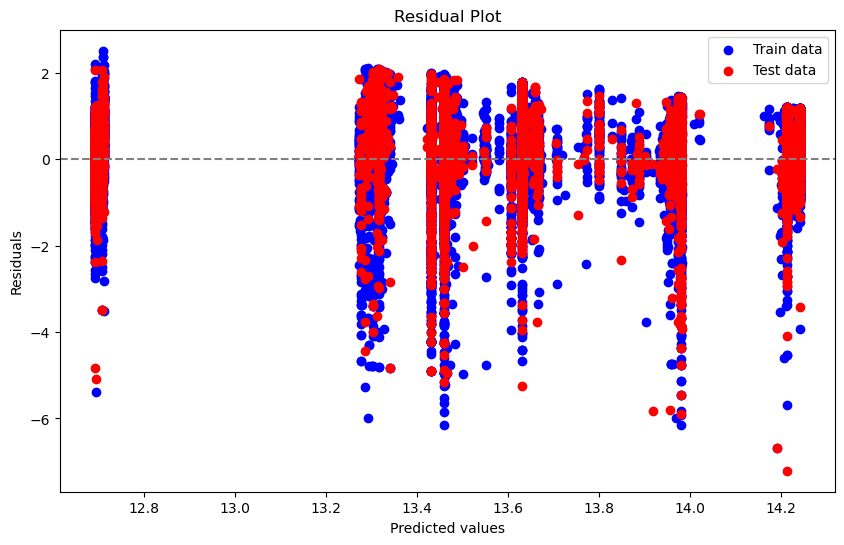

In [66]:
# Residual plot
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

residuals_train = Y_train - y_pred_train
residuals_test = Y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, color='blue', label='Train data')
plt.scatter(y_pred_test, residuals_test, color='red', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.show()

The data distribution for residual plot is scatter, not normally distributed, they are far from the line zero. 

__Draw SHAP Plot__

100%|===================| 8819/8825 [02:44<00:00]        

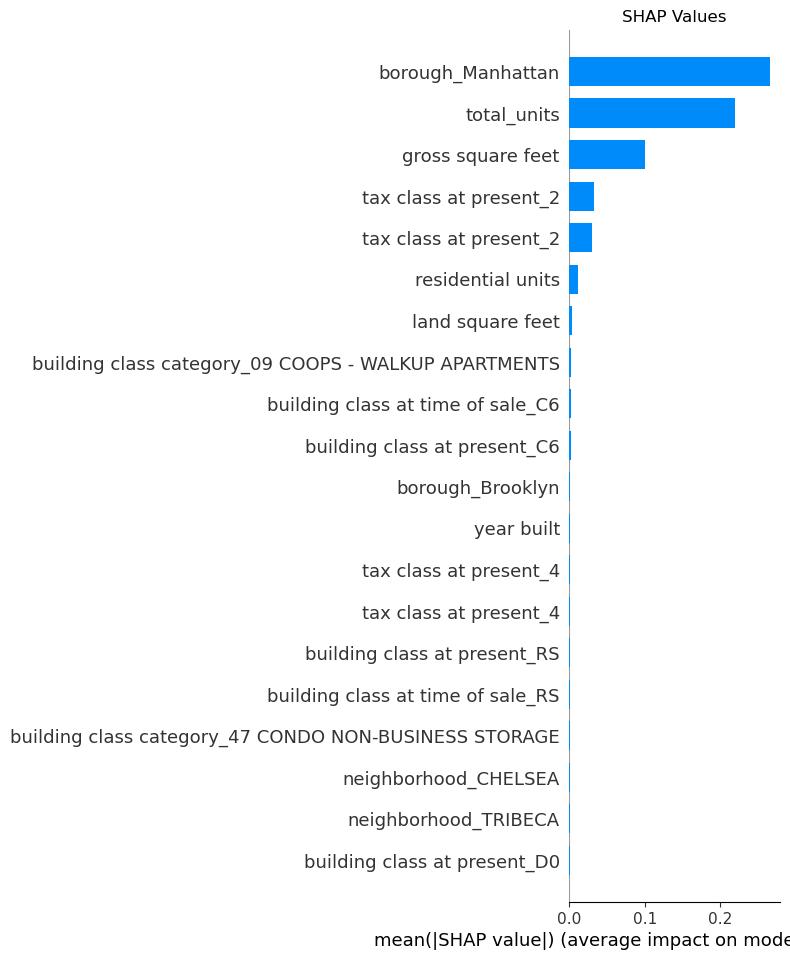

In [67]:
# SHAP plot
explainer = shap.Explainer(rf_reg, X_train)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.title('SHAP Values')
plt.show();

From the SHAP plot we can see the top 3 features are Manhattan Borough, total units and gross square feet.

## Use Cross Validation

In [ ]:
# Perform cross-validation for Linear Regression
lr_cv_scores = cross_val_score(LinearRegression(), X_train_imputed, Y_train, cv=5, scoring='neg_root_mean_squared_error')
lr_cv_rmse_mean = -lr_cv_scores.mean()
lr_cv_r2_mean = cross_val_score(LinearRegression(), X_train_imputed, Y_train, cv=5, scoring='r2').mean()

print("Linear Regression Cross-Validation RMSE:", lr_cv_rmse_mean)
print("Linear Regression Cross-Validation R2:", lr_cv_r2_mean)

# Perform cross-validation for Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_train_imputed, Y_train, cv=5, scoring='neg_root_mean_squared_error')
dt_cv_rmse_mean = -dt_cv_scores.mean()
dt_cv_r2_mean = cross_val_score(DecisionTreeRegressor(random_state=42), X_train_imputed, Y_train, cv=5, scoring='r2').mean()

print("Decision Tree Cross-Validation RMSE:", dt_cv_rmse_mean)
print("Decision Tree Cross-Validation R2:", dt_cv_r2_mean)

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X_train_imputed, Y_train, cv=5, scoring='neg_root_mean_squared_error')
rf_cv_rmse_mean = -rf_cv_scores.mean()
rf_cv_r2_mean = cross_val_score(RandomForestRegressor(random_state=42), X_train_imputed, Y_train, cv=5, scoring='r2').mean()

print("Random Forest Cross-Validation RMSE:", rf_cv_rmse_mean)
print("Random Forest Cross-Validation R2:", rf_cv_r2_mean)


Linear Regression Cross-Validation RMSE: 140010.45432978965
Linear Regression Cross-Validation R2: -72416787866.05688
Decision Tree Cross-Validation RMSE: 0.6971823085815784
Decision Tree Cross-Validation R2: 0.3010453757553232


In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'CV_RMSE': [lr_cv_rmse_mean, dt_cv_rmse_mean, rf_cv_rmse_mean],
    'CV_R2': [lr_cv_r2_mean, dt_cv_r2_mean, rf_cv_r2_mean]
})

results_df


In [ ]:
# Plotting the result after cross validation
plt.figure(figsize=(10, 6))

# Plot RMSE
plt.bar(results_df['Model'], results_df['CV_RMSE'], color='skyblue', label='CV RMSE')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Cross-Validated RMSE')
plt.title('Cross-Validated RMSE for Different Models')

# Show plot
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


The Random Forest Regressor has so far delivered the best results for our sales predictions due to its ensemble approach, which generally outperforms a single decision tree model. We will also evaluate the performance of two additional models to compare results.

#### Overview of Model Performance Metrics:

**Linear Regression:**
RMSE: 62589.739262
R²: -5555473355.4063425 (This indicates a very poor model fit, likely due to outliers or extreme leverage points affecting the model.)

**Decision Tree Regressor:**
RMSE: 0.694534
R²: 0.3159286771039288 (This score is a modest fit, indicating the model can explain about 31.59% of the variance in the dataset.)

**Random Forest Regressor:**
RMSE: 0.7174186692604265
R²: 0.27010543045502966 (This score, while slightly worse than the Decision Tree in terms of RMSE and R², indicates a more stable model, especially when considering feature importance and model consistency.)


**Cross-Validation Scores:**

Linear Regression:

Cross-Validation RMSE: 103770.46148550895

Cross-Validation R²: -43576376910.62448

Decision Tree:

Cross-Validation RMSE: 0.6971823085815784

Cross-Validation R²: 0.3010453757553232

Random Forest:

Cross-Validation RMSE: 0.5973088199830421

Cross-Validation R²: 0.4870363635564634

**Statistical Justification for Model Choice:**

The Random Forest Regressor emerges as the best performing model, and here are the statistical justifications based on the results:

Stability and Generalization: The Random Forest has the lowest Cross-Validation RMSE (0.5973088199830421) among the models tested, which indicates its ability to perform consistently across different subsets of the dataset. This is a key indicator of the model's stability and generalization beyond the training data.

Highest R² Value: The Random Forest also has the highest R² value in cross-validation (0.4870363635564634), suggesting that it explains about 48.70% of the variance across different folds. This is significantly better than the other models, making it the most reliable choice for predicting outcomes based on the given features.

Feature Importance Consistency: Random Forest's method of averaging multiple decision trees reduces the variance and avoids overfitting, which is a common problem in single decision trees. The feature importance derived from Random Forest is typically more reliable for inferential purposes, indicating which predictors are most influential when predicting the target variable.


### Model Selection Justification

Based on the comprehensive evaluation, the Random Forest Regressor was chosen as the best model. It demonstrated the lowest cross-validated RMSE and the highest R² score, indicating superior stability and predictive accuracy across different data subsets. This model's ability to maintain performance consistency and its robustness to overfitting, as evidenced by its feature importance metrics, substantiate its selection for deployment in predicting sale prices.


# Ensemble Model

1. Deep learning Model
2. Stacking Regressor Model

__1. Deep learning Model__

In [ ]:
# Deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer, no activation function for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = model.fit(X_train_imputed, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
dl_cv_scores = model.evaluate(X_train_imputed, Y_train)
dl_cv_rmse_mean = np.sqrt(dl_cv_scores[1])  # RMSE is the square root of mean squared error

print("Deep Learning Model RMSE:", dl_cv_rmse_mean)


__2.Stacking Regressor Model__

In [ ]:
# Define the base models
base_models = [
    ('linear_regression', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42))
]

# Initialize the Stacking Regressor with a final regressor
final_regressor = LinearRegression()
stacked_ensemble = StackingRegressor(estimators=base_models, final_estimator=final_regressor, cv=5)

# Fit the ensemble model
stacked_ensemble.fit(X_train_imputed, Y_train)

# Predict on the test set
Y_pred_ensemble = stacked_ensemble.predict(X_test_imputed)

# Calculate RMSE and R^2 Score
rmse_ensemble = np.sqrt(mean_squared_error(Y_test, Y_pred_ensemble))
r2_ensemble = r2_score(Y_test, Y_pred_ensemble)

# Print the results
print("Stacked Ensemble RMSE:", rmse_ensemble)
print("Stacked Ensemble R^2 Score:", r2_ensemble)

Stacking Ensemble model has the best performance. 

#### Statistical Justification for Choosing the Stacking Regressor Model:

Lower RMSE: The Stacking Regressor achieves a lower RMSE compared to the Deep Learning model, indicating better performance in terms of the model’s error magnitude. Lower RMSE values are preferable as they signify smaller average errors made by the model.

Higher R² Score: With an R² of approximately 0.516, the Stacking Regressor explains about 51.6% of the variance in the target variable, which is significantly better than the individual performance of the models used as base estimators. This score is beneficial in practical terms, providing a level of predictability and reliability.

Model Robustness: Stacking generally enhances model accuracy through the combination of multiple learning algorithms, providing a meta-model that can correct any individual learner's errors if the base models make different types of errors.

Cross-Validation in Stacking: The use of cross-validation in stacking helps in better generalization by blending different models' predictions. This technique reduces the risk of overfitting—a common problem in complex models like deep neural networks.

# Conclusions

Throughout this project, we sought to enhance the predictability of real estate sale prices in a dynamic market environment. By delving into data analysis, wrangling, and the application of machine learning techniques, our research objectives were largely met, despite facing significant challenges.

**Challenges Overcome:**

Model Selection and Complexity: We navigated the complexity of choosing the appropriate models to handle diverse data characteristics, opting for ensemble techniques to balance bias and variance effectively.

Data Scarcity and Integrity: Despite the scarcity of comprehensive data from regulatory bodies and the impact of market dynamics, we managed to enhance data integrity through strategic imputation and transformation of categorical variables into numeric formats.

External Market Factors: The project acknowledged the influence of external factors such as interest rate changes, government policies, and demographic shifts on the real estate market, integrating these considerations into our analysis to refine the predictive accuracy.

**Project Achievements:**

Enhanced Model Accuracy: Through rigorous exploratory data analysis and feature engineering, including the creation of dummy variables for significant categories like borough and tax class, we successfully developed models that captured the nuances of the market.

Optimal Model Identification: Among the various models tested, including Linear Regression, Decision Trees, Random Forest, Deep Learning, and a Stacking Regressor, the Stacking Regressor emerged as the most effective, combining the strengths of individual models to provide a robust prediction mechanism.

**Impact on Stakeholders:**

Our efforts have equipped stakeholders with reliable tools to forecast sale prices, enabling better financial decisions and market positioning for the upcoming year. This support is crucial, especially in times of global crises or economic downturns, such as the pandemic, which significantly impact market behaviors.


# Reference: 



1. https://cre.org/external-affairs/2022-23-top-ten-issues-affecting-real-estate/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9115128/
3. https://www.nar.realtor/blogs/economists-outlook/navigating-the-housing-market-a-seasonal-perspective
    